MPS Born machines

Unsupervised Generative Modeling Using Matrix Product States  
論文  
https://arxiv.org/pdf/1709.01662.pdf  
github  
https://github.com/congzlwag/UnsupGenModbyMPS   


データ$x$の確率分布  
$$
p(x)=\frac{|\psi(x)|^2}{z}
$$

$\psi(x)$は、$A_{v_i}^{(i)}$のMPS状態  
$$
\psi(x) = Tr(A_{v_1}^{(1)}A_{v_2}^{(2)}A_{v_3}^{(3)} ...A_{v_n}^{(n)})
$$

データセットの負の対数尤度LLMを誤差関数として、パラメータ更新する  

$$
L = - \sum_i \frac{1}{|T|} ln p(x_i)
$$

データ生成  
初期データ$x_0$のデータから、データ$x_1$を生成  
$x_0$から1ビットのデータを反転したデータを$x_1$とする。  

MPSからデータの出現確率を計算して、  
$\psi(x_1)/\psi(x_0)>1$ならば状態遷移する。    
そうでなければ0～1の一様乱数rから$\psi(x_1)/\psi(x_0) < r$であれば、$x_1$に遷移する。  

BASデータセットの作成

torch.Size([100, 9])


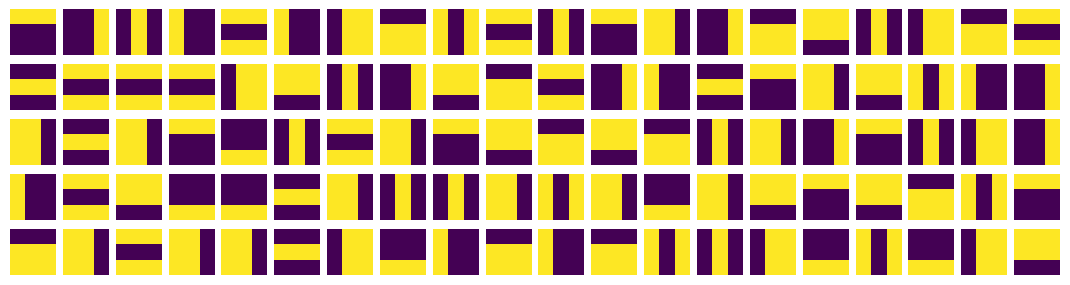

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#torch.manual_seed(100)
#np.random.seed(seed=100)

#3×3 BASデータセット
t = torch.tensor([[1,1,1,0,0,0,0,0,0],
                  [0,0,0,1,1,1,0,0,0],
                  [0,0,0,0,0,0,1,1,1],
                  [1,0,0,1,0,0,1,0,0],
                  [0,1,0,0,1,0,0,1,0],
                  [0,0,1,0,0,1,0,0,1],
                  [1,1,1,1,1,1,0,0,0],
                  [1,1,1,0,0,0,1,1,1],
                  [0,0,0,1,1,1,1,1,1],
                  [0,1,1,0,1,1,0,1,1],
                  [1,1,0,1,1,0,1,1,0],
                  [1,0,1,1,0,1,1,0,1]])

#データセット作成
x = torch.zeros((100,9))
for i in range(100):
    r = torch.randint(low=0, high=12, size=(1,))
    x[i] = t[r]

    
print(x.shape)
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(left=0.075,right=0.95,bottom=0.05,top=0.50,wspace=0.15,hspace=0.10)

axs = []
for i in range(100):
    axs.append(fig.add_subplot(5, 20, i+1))
    axs[-1].imshow(x[i].reshape(3, 3))
    axｓ[-1].axis("off")

学習 loss確認

Loss =  2.4680855


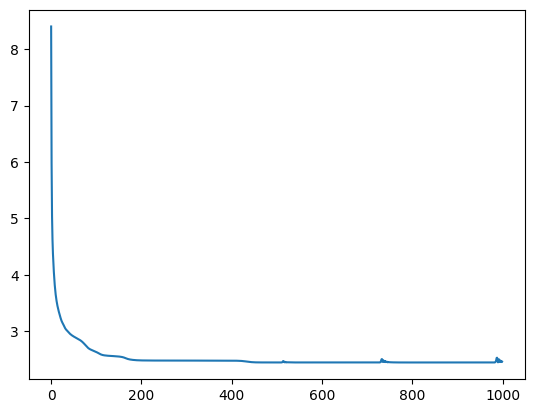

In [2]:
import mps_born_machines 
torch.manual_seed(100)
np.random.seed(100)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = mps_born_machines.mps_born_machines (x_num=9,b=10,lr=0.1)
epoch=100
loss_reg = []
for i in range(epoch):
    loss = model.learn(x)
    loss_reg.append(loss)
#表示
print('Loss = ',loss_reg[epoch-1])
plt.plot(loss_reg)

サンプリング

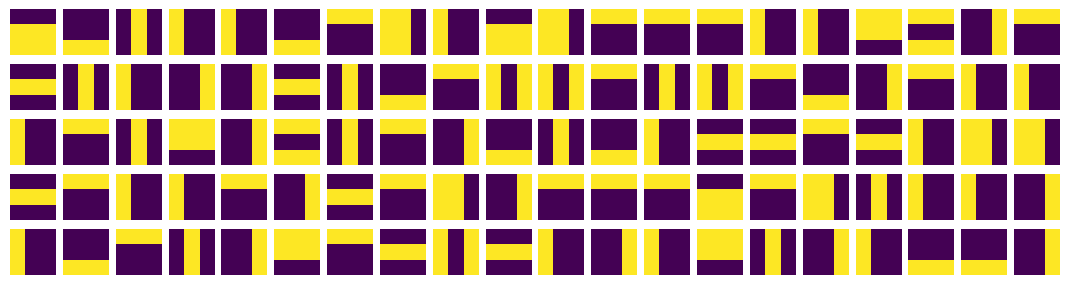

In [3]:
torch.manual_seed(100)
np.random.seed(100)

#サンプリングデータ格納用
x0 = torch.zeros((100,9))   # 初期データ
x1 = model.generate(x0,step=1000) # データ生成

#表示
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(left=0.075,right=0.95,bottom=0.05,top=0.50,wspace=0.15,hspace=0.10)

axs = []
for i in range(100):
    axs.append(fig.add_subplot(5, 20, i+1))
    axs[-1].imshow(x1[i].reshape(3, 3))
    axｓ[-1].axis("off")

出現頻度チェック

[21.  6.  5. 24. 16. 17.  1.  0.  1.  1.  5.  3.]


<BarContainer object of 12 artists>

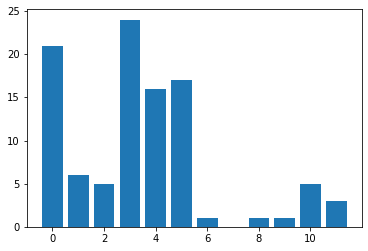

In [30]:
bas_chk=np.zeros(12)
for i in range(100):
    if (x1[i] == t[0]).all() == True:
        bas_chk[0] +=1 
    if (x1[i] == t[1]).all() == True:
            bas_chk[1] +=1 
    if (x1[i] == t[2]).all() == True:
        bas_chk[2] +=1 
    if (x1[i] == t[3]).all() == True:
        bas_chk[3] +=1 
    if (x1[i] == t[4]).all() == True:
        bas_chk[4] +=1 
    if (x1[i] == t[5]).all() == True:
        bas_chk[5] +=1 
    if (x1[i] == t[6]).all() == True:
        bas_chk[6] +=1 
    if (x1[i] == t[7]).all() == True:
        bas_chk[7] +=1 
    if (x1[i] == t[8]).all() == True:
        bas_chk[8] +=1 
    if (x1[i] == t[9]).all() == True:
        bas_chk[9] +=1 
    if (x1[i] == t[10]).all() == True:
        bas_chk[10] +=1 
    if (x1[i] == t[11]).all() == True:
        bas_chk[11] +=1 

left = np.array([0,1, 2, 3, 4, 5,6,7,8,9,10,11])
print(bas_chk)
plt.bar(left, bas_chk)